In [1]:
import pandas as pd
import numpy as np
import folium
from folium import plugins

In [ ]:
df = pd.read_csv("caso.csv")
df

In [3]:
estados = df.loc[df.place_type=='state',:]
estados.state.unique()

array(['AP', 'AC', 'AM', 'AL', 'DF', 'ES', 'CE', 'BA', 'MS', 'MA', 'GO',
       'MT', 'PA', 'PE', 'PB', 'PI', 'RJ', 'MG', 'RN', 'RR', 'RO', 'PR',
       'SE', 'SC', 'TO', 'RS', 'SP'], dtype=object)

In [4]:
data = estados[['date','state','confirmed','deaths','is_last']]
data

,date,state,confirmed,deaths,is_last
0,2022-03-27,AP,160328,2122,True
1,2022-03-26,AP,160321,2122,False
2,2022-03-25,AP,160314,2122,False
3,2022-03-24,AP,160301,2122,False
4,2022-03-23,AP,160288,2122,False
...,...,...,...,...,...
2515988,2020-02-29,SP,2,0,False
2515989,2020-02-28,SP,2,0,False
2515990,2020-02-27,SP,1,0,False
2515991,2020-02-26,SP,1,0,False


In [5]:
data.loc[data.is_last==True , ['confirmed','deaths'] ].sum()

confirmed    29849740
deaths         659159
dtype: int64

In [6]:
covid = pd.DataFrame()

In [7]:
estado = 'AM'
situacao = 'confirmed'
df_estado = data.loc[data.state==estado, :]
df_estado = df_estado.groupby('date').sum()[situacao].reset_index()
df_estado = df_estado.drop("date", axis=1)
df_estado.columns = [estado]
covid = pd.concat([covid, df_estado], ignore_index=True, axis=1)

<ipython-input-7-9012f49b5d0d>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_estado = df_estado.groupby('date').sum()[situacao].reset_index()


In [45]:
def desde1caso(data, estados, dias, situacao):

  covid = pd.DataFrame()

  for estado in estados:
    try:
      df_estado = data.loc[data.state==estado, :]
      df_estado = df_estado.groupby('date').sum()[situacao].reset_index()
      df_estado = df_estado.drop("date", axis=1)
      covid = pd.concat([covid, df_estado], ignore_index=True, axis=1)
    except:
      print("Is not " + situacao + " in " + estado )

  covid.columns = estados

  return covid.head(dias)

In [ ]:
casos_covid_estados = desde1caso(data,['AM','MT','RN','PR','ES'], 30,'deaths')

<Axes: >

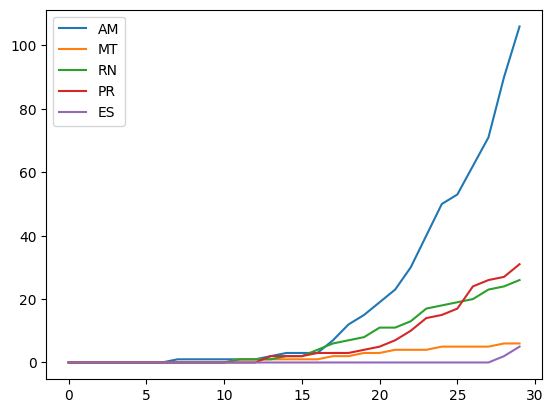

In [10]:
casos_covid_estados.plot()

In [ ]:
mortes_covid_norte = desde1caso(data,['AC','AM','AP','PA','RR','RO','TO'], 30,'deaths')

<Axes: >

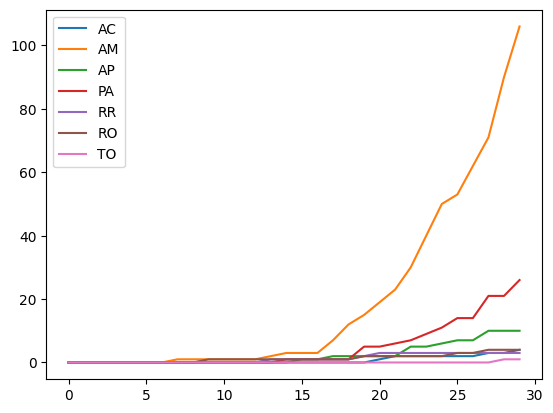

In [12]:
mortes_covid_norte.plot()

In [48]:
df_corr = pd.DataFrame()

In [49]:
am_confirmed = desde1caso(data,['AM'], 100,'confirmed')
am_death     = desde1caso(data,['AM'], 100,'deaths')

<ipython-input-45-fa37b576b12f>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_estado = df_estado.groupby('date').sum()[situacao].reset_index()
<ipython-input-45-fa37b576b12f>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_estado = df_estado.groupby('date').sum()[situacao].reset_index()


In [50]:
df_corr = covid = pd.concat([df_corr, am_confirmed, am_death], ignore_index=True, axis=1)
df_corr.columns = ['confirmed', 'deaths']

In [51]:
def correlacao_casos_mortes(data, estado, dias):
    df_corr         = pd.DataFrame()
    am_confirmed    = desde1caso(data, estado, dias,'confirmed')
    am_death        = desde1caso(data, estado, dias,'deaths')
    df_corr         = pd.concat([df_corr, am_confirmed, am_death], ignore_index=True, axis=1)
    df_corr.columns = ['confirmed', 'deaths']

    return df_corr

In [52]:
df_corr = correlacao_casos_mortes(data, ['AM'], 100)

<ipython-input-45-fa37b576b12f>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_estado = df_estado.groupby('date').sum()[situacao].reset_index()
<ipython-input-45-fa37b576b12f>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_estado = df_estado.groupby('date').sum()[situacao].reset_index()


<Axes: >

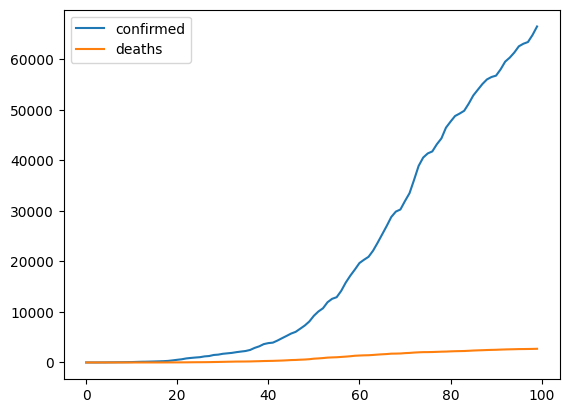

In [19]:
df_corr.plot()

In [53]:
df_corr.corr(method='pearson')

,confirmed,deaths
confirmed,1.000000,0.980338
deaths,0.980338,1.000000


In [21]:
ultimas = estados.loc[estados.is_last==True, ['state','confirmed']]

In [22]:
len(ultimas)

27

In [23]:
import folium
from folium import plugins

import json

br_estados = 'br_states.json'
geo_json_data = json.load(open(br_estados))

In [24]:
ultimas_map = ultimas.set_index('state')['confirmed']

In [25]:
mapa = folium.Map(
    width=800, height=600,
    location=[-15.77972, -47.92972],
    zoom_start=4
)

In [26]:
estados = df.loc[df.place_type == 'state', ['state', 'confirmed', 'deaths', 'is_last']]

In [ ]:
estados.head()

In [ ]:
estados.isnull().sum()

In [28]:
estados.loc[estados.deaths.isnull(), 'deaths'] = 0

In [29]:
ultimas = estados.loc[ estados.is_last == True, ['state', 'confirmed', 'deaths']]

In [ ]:
geo_json_data

In [44]:
mapa.choropleth(
    geo_data = geo_json_data,
    name = "CASOS",
    data = ultimas,
    columns = ['state', 'confirmed'],
    key_on = 'feature.id',
    fill_color = "OrRd",
    fill_opacity = 1.0,
    line_color = 'white',
    line_opacity = 1.0,
    show = True,
    legend_name = "CASOS DE COVID-19 POR ESTADO BRASILEIRO"

)
mapa

/usr/local/lib/python3.10/dist-packages/folium/folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [40]:
ultimas['log_confirmed'] = np.log(ultimas['confirmed']+1)
ultimas['log_deaths'] = np.log(ultimas['deaths']+1)

In [41]:
mapa.choropleth(
    geo_data = geo_json_data,
    name = "CASOS",
    data = ultimas,
    columns = ['state', 'log_confirmed'],
    key_on = 'feature.id',
    fill_color = "BuGn",
    fill_opacity = 1.0,
    line_color = 'white',
    line_opacity = 1.0,
    show = True,
    legend_name = "LOG DE CASOS DE COVID POR ESTADO NO BRASIL"

)
mapa

/usr/local/lib/python3.10/dist-packages/folium/folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [35]:
ultimas['log_confirmed'] = np.log(ultimas['confirmed']+1)
ultimas['log_deaths'] = np.log(ultimas['deaths']+1)

In [38]:
mapa.choropleth(
    geo_data = geo_json_data,
    name = "CASOS",
    data = ultimas,
    columns = ['state', 'log_deaths'],
    key_on = 'feature.id',
    fill_color = "Reds",
    fill_opacity = 1.0,
    line_color = 'white',
    line_opacity = 1.0,
    show = True,
    legend_name = "MORTES POR COVID-19 POR ESTADO BRASILEIRO"

)

/usr/local/lib/python3.10/dist-packages/folium/folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [39]:
mapa

In [ ]:
estados.isnull().sum()

In [ ]:
estados.loc[estados.deaths.isnull(), 'deaths'] = 0